In [1]:
!pip install opencv-python transformers

In [6]:
# Load model directly
import pickle
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from typing import Tuple, List, Dict, Any

import torch
import torch.nn as nn
from torch.nn import LSTM, Sequential, Linear, Sigmoid, ReLU, Conv2d
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vgg16, resnet50

from sklearn.model_selection import StratifiedShuffleSplit, GroupShuffleSplit, StratifiedGroupKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc

from transformers import AutoImageProcessor, AutoModelForImageClassification
import utils
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models import vgg16, resnet50
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("dima806/facial_emotions_image_detection")
model = AutoModelForImageClassification.from_pretrained("dima806/facial_emotions_image_detection")

In [3]:
import cv2
from PIL import Image
import torch
import matplotlib.pyplot as plt

video_path = '/project_ghent/Master-Thesis/featureExtraction/output_videos_face_cropped_split/NO/2023-04-13 10-58-57_interaction_1_utterance_4_merged_cropped_extracted_0.mp4' 

cap = cv2.VideoCapture(video_path)
for _ in range(10):
    success, frame = cap.read()

    if success:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(frame_rgb)

        encoding = processor(images=image, return_tensors="pt")

        print(encoding.pixel_values.shape)
        
        with torch.no_grad():
            outputs = model(**encoding)

        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        
        predicted_class_index = probs.argmax().item()
        class_names = model.config.id2label
        predicted_class_name = class_names[predicted_class_index]
        
        plt.figure(figsize=(4, 3))
        plt.imshow(frame_rgb)
        plt.title(f"Prediction: {predicted_class_name}")
        plt.axis('off')
        plt.show()
        
    else:
        cap.release()
        break


torch.Size([1, 3, 224, 224])


TypeError: BackBoneModelDima806.forward() got an unexpected keyword argument 'pixel_values'

In [31]:
model.classifier = torch.nn.Identity()
model.classifier = torch.nn.Linear(in_features=768, out_features=10, bias=True)
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [49]:
import cv2
from PIL import Image
import torch
import matplotlib.pyplot as plt

video_path = '/project_ghent/Master-Thesis/featureExtraction/output_videos_face_cropped_split/NO/2023-04-13 10-58-57_interaction_1_utterance_4_merged_cropped_extracted_0.mp4' 

cap = cv2.VideoCapture(video_path)
features = None

while True:
    success, frame = cap.read()

    if success:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(frame_rgb)

        encoding = processor(images=image, return_tensors="pt")

        with torch.no_grad():
            outputs = model(**encoding)

        if features is None:
            features = outputs.logits
        else:
            features = torch.vstack((features, outputs.logits))
            print(features.shape)
    else:
        cap.release()
        break


torch.Size([2, 768])
torch.Size([3, 768])
torch.Size([4, 768])
torch.Size([5, 768])
torch.Size([6, 768])
torch.Size([7, 768])
torch.Size([8, 768])
torch.Size([9, 768])
torch.Size([10, 768])
torch.Size([11, 768])
torch.Size([12, 768])
torch.Size([13, 768])
torch.Size([14, 768])
torch.Size([15, 768])
torch.Size([16, 768])
torch.Size([17, 768])
torch.Size([18, 768])
torch.Size([19, 768])
torch.Size([20, 768])
torch.Size([21, 768])
torch.Size([22, 768])
torch.Size([23, 768])
torch.Size([24, 768])
torch.Size([25, 768])
torch.Size([26, 768])
torch.Size([27, 768])
torch.Size([28, 768])
torch.Size([29, 768])
torch.Size([30, 768])
torch.Size([31, 768])
torch.Size([32, 768])
torch.Size([33, 768])
torch.Size([34, 768])
torch.Size([35, 768])
torch.Size([36, 768])
torch.Size([37, 768])
torch.Size([38, 768])
torch.Size([39, 768])
torch.Size([40, 768])
torch.Size([41, 768])
torch.Size([42, 768])
torch.Size([43, 768])
torch.Size([44, 768])
torch.Size([45, 768])
torch.Size([46, 768])
torch.Size([47, 76

In [3]:
import utils

path2data = "/project_ghent/Master-Thesis/featureExtraction/output_videos_face_cropped_split"
SKIP_FRAMES = 10

# ids, labels, groups, catgs = utils.get_vids(path2data)
ids, labels, groups, catgs = utils.get_vids(path2data, maxpercat=[100, 300])
utils.split_dataset(ids, labels, groups, skipframes=SKIP_FRAMES, name="small_hf", is_hf=True)

Name		 ids labels groups
--------------------------------------
Train_val: 	 357 357 31
Test: 		 43 43 4
Train: 		 273 273 23
Validation: 	 84 84 8
--------------------------------------
Name distribution:	 YES - NO
Original distribution:	 0.75 - 0.25
Train distribution:	 0.7472527472527473 - 0.25274725274725274
Val distribution:	 0.7619047619047619 - 0.23809523809523808
Test distribution:	 0.7441860465116279 - 0.2558139534883721
--------------------------------------
Succesfully saved at /project_ghent/Master-Thesis/ownModelNotebooks/pickled/ with skipframes = 10 [small_hf]


Retrieving datasets and loaders...
Succesfully retrieved at /project_ghent/Master-Thesis/ownModelNotebooks/pickled/ with skipframes = 5 [small_hf]
Initializing parameters...
Training...


Epoch 2/2: 100%|██████████| 137/137 [02:33<00:00,  1.12s/batch, Loss=0.107]


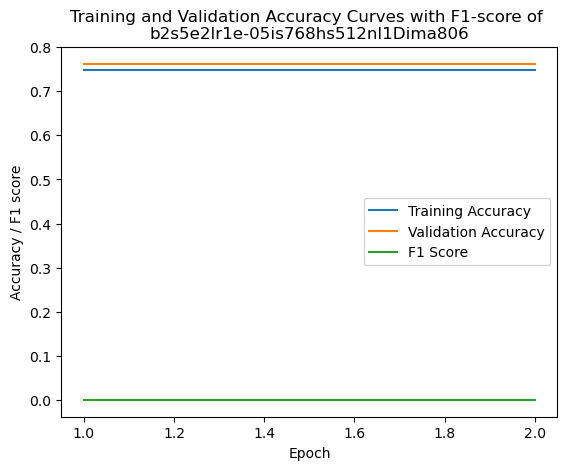

Plotting confusion matrix...


<Figure size 640x480 with 0 Axes>

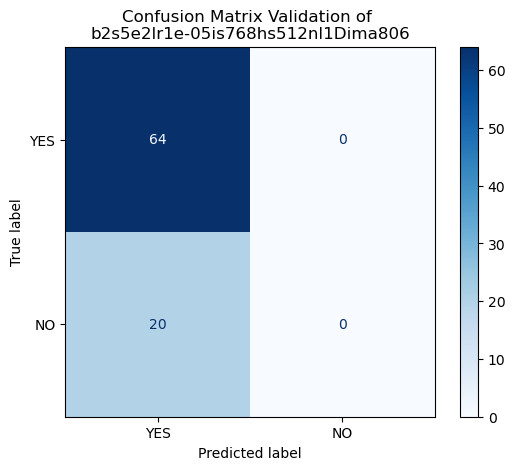

Plotting ROC curve...


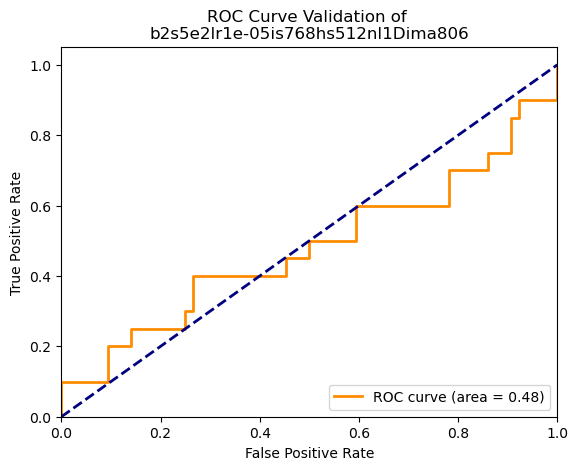

Saving model...


In [1]:
import utils
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models import vgg16, resnet50
from transformers import AutoImageProcessor, AutoModelForImageClassification

seed = 42

name_data = "small_hf"
batch_size = 2
skipframes = 5
num_epochs = 2
lr = 1e-5
num_workers = 4
pos_weight = 0.378
INPUT_SIZE = 768
HIDDEN_SIZE = 512
NUM_LAYERS = 1

AMOUNT_OF_FRAMES = 120
name = f"b{batch_size}s{skipframes}e{num_epochs}lr{lr}is{INPUT_SIZE}hs{HIDDEN_SIZE}nl{NUM_LAYERS}Dima806"

processor = AutoImageProcessor.from_pretrained("dima806/facial_emotions_image_detection")
model = AutoModelForImageClassification.from_pretrained("dima806/facial_emotions_image_detection")

print("Retrieving datasets and loaders...")

train_ds, val_ds, test_ds = utils.get_dataset(skipframes=skipframes, name=name_data)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, worker_init_fn=np.random.seed(seed), num_workers=num_workers)
val_dl = DataLoader(val_ds, batch_size=2*batch_size, shuffle=False, num_workers=num_workers)  
test_dl = DataLoader(test_ds, batch_size=2*batch_size, shuffle=False, num_workers=num_workers)

print("Initializing parameters...")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = utils.BackBoneModelDima806(input_size=INPUT_SIZE, 
                               hidden_size=HIDDEN_SIZE, 
                               num_layers=NUM_LAYERS,
                               amount_of_frames=AMOUNT_OF_FRAMES//skipframes
                              ).to(device)

# criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCEWithLogitsLoss(reduction='mean', pos_weight=torch.tensor([pos_weight]).to(device))
optimizer = optim.Adam(model.parameters(), lr=lr)

parameters = {"device": device, 
              "epochs": num_epochs,
              "trainloader": train_dl,
              "valloader": val_dl,
              "testloader": test_dl,
              "criterion": criterion,
              "optimizer": optimizer,
              "batch_size": batch_size,
              "amount_of_frames": AMOUNT_OF_FRAMES // skipframes,
              "categories":  utils.categories.keys(),
              "decision": 0.5}

print("Training...")

utils.train_and_plot(model, parameters, name)

print("Plotting confusion matrix...")

utils.plot_confusionmatrix(model, parameters, name, mode="Validation", verbose=False)

print("Plotting ROC curve...")

utils.plot_roc_curve(model, parameters, name, mode="Validation", verbose=False)

print("Saving model...")

torch.save(model, f"/project_ghent/Master-Thesis/ownModelNotebooks/models/image_{name}.pth")